In [1]:
# # Run this cell to mount your Google Drive.
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing 
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import tensorflow as tf

from sklearn.feature_selection import VarianceThreshold
# from keras.backend import manual_variable_initialization 
# # manual_variable_initialization(True)

Using TensorFlow backend.


In [3]:
data_p = pd.read_csv("points.csv",dtype=object,error_bad_lines=False) 
data_p.head()
data_p["id"] = data_p["id"].map(str) +"_"+ data_p["dir"]
data_p.head()
# data_p.dtypes

,s.no,id,dir,path,date,x1,y1,x2,y2,x3,...,x9996,y9996,x9997,y9997,x9998,y9998,x9999,y9999,x10000,y10000
0,1,ON_1_20181031_173504_104,104,C:\Hilink\BB4A\RESULT\BBM2\BBM2\NOMINAL\MANUAL...,31/10/2018,0.2,0.03,0.2,0.03,0.2,...,0.2,0.14,0.2,0.14,0.2,0.14,0.2,0.14,0.2,0.14
1,2,OFF_4_20181031_173921_104,104,C:\Hilink\BB4A\RESULT\BBM2\BBM2\NOMINAL\MANUAL...,31/10/2018,0.4,0.12,0.2,0.12,0.2,...,25.0,0.03,25.0,0.03,25.0,0.03,25.0,0.03,25.0,0.03
2,3,OFF_2_20181031_173628_104,104,C:\Hilink\BB4A\RESULT\BBM2\BBM2\NOMINAL\MANUAL...,31/10/2018,0.2,0.13,0.0,0.12,0.0,...,25.0,0.03,25.0,0.03,25.0,0.02,25.0,0.02,25.0,0.03
3,4,ON_3_20181031_173800_104,104,C:\Hilink\BB4A\RESULT\BBM2\BBM2\NOMINAL\MANUAL...,31/10/2018,0.2,0.03,0.4,0.02,0.4,...,0.2,0.14,0.0,0.14,0.2,0.14,0.2,0.14,0.2,0.14
4,5,OFF_4_20181102_085018_103,103,C:\Hilink\BB4A\RESULT\BBM2\BBM2\NOMINAL\MANUAL...,02/11/2018,0.2,0.15,0.2,0.16,0.2,...,25.0,0.05,25.0,0.06,25.0,0.05,25.2,0.05,25.0,0.05


In [4]:

data_v = pd.read_csv("values.csv",dtype=object,error_bad_lines=False )
le = preprocessing.LabelEncoder()

data_v['power_state_spec'] = le.fit_transform(data_v['power_state_spec'].astype('str'))

data_v['power_state_value'] = le.fit_transform(data_v['power_state_value'].astype('str'))
data_v["id"] = data_v["id"].map(str) +"_"+data_v["dir"]
data_v.head()

,s.no,id,dir,_file_,power_state_value,current_rise/fall_time_value (mS),current_stabilised_value (mA),current_max/min_value (mA),power_state_spec,current_rise/fall_time_spec (mS),current_stabilised_spec (mA),current_max/min_spec (mA),power_state_N/NC,current_rise/fall_time_C/NC,current_stabilised_C/NC,current_max/min_C/NC
0,1,ON_1_20181031_173504_104,104,HEGSE_72.HTM,1,89.990000000000,150.000000000000,405.992200000000,1,60,510.204,800,C,NC,C,C
1,2,OFF_2_20181031_173628_104,104,HEGSE_72.HTM,0,7.992000000000,30.000000000000,-56.000000000000,0,10,510.204,-100,C,C,C,C
2,3,ON_3_20181031_173800_104,104,HEGSE_72.HTM,1,89.950000000000,140.000000000000,405.992200000000,1,60,495.049,800,C,NC,C,C
3,4,OFF_4_20181031_173921_104,104,HEGSE_72.HTM,0,7.997000000000,30.000000000000,-58.000000000000,0,10,495.049,-100,C,C,C,C
4,5,ON_1_20181102_084600_103,103,HEGSE_72.HTM,1,56.650000000000,169.800000000000,405.992200000000,1,60,510.204,800,C,C,C,C


In [5]:
arr_v = data_v.values
arr_p = data_p.values

In [6]:
arr_v = arr_v[0:]
# print(arr_v)
arr_p = arr_p[0:]
# print(arr_p)

In [7]:
ON_list =[]
OFF_list = []
for i in range(len(arr_p)):
    s = arr_p[i][1]
    s = str(s)
    
#     print(type(st))
    if s.find("N") == -1:
        OFF_list.append(arr_p[i])
    
    else:
        ON_list.append(arr_p[i])
# calculating for ON
print(len(ON_list),"ON")
print(len(OFF_list),"OFF")
arr_on_p = np.array(OFF_list)
# print(arr_on_p)

426 ON
398 OFF


In [8]:
arr_on_p = np.delete(arr_on_p, 3,  axis=1)
arr_on_p_n = arr_on_p[:, 1::2]
arr_on_p_f = np.delete(arr_on_p_n, 1,  axis=1)
# print(len(arr_on_p_f))
# print(len(arr_on_p_f[0]))
# print(arr_on_p_f[0])

In [9]:
data = arr_on_p_f

df=pd.DataFrame(data=data[0:,0:],index=[i for i in range(data.shape[0])],
                columns=['y'+str(i) for i in range(data.shape[1])])
df.head()
# df.dtypes


,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y9991,y9992,y9993,y9994,y9995,y9996,y9997,y9998,y9999,y10000
0,OFF_4_20181031_173921_104,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
1,OFF_2_20181031_173628_104,0.13,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.03
2,OFF_4_20181102_085018_103,0.15,0.16,0.15,0.15,0.15,0.15,0.15,0.15,0.14,...,0.06,0.06,0.06,0.06,0.06,0.05,0.06,0.05,0.05,0.05
3,OFF_2_20181102_084723_103,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.05,0.05,0.05
4,OFF_4_20181102_090312_102,0.15,0.14,0.14,0.15,0.15,0.15,0.14,0.14,0.14,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06


In [10]:
print(df.shape)
# for j in range(10000):
#   var = "y"+str(j+1)
#   df[var].fillna(df[var].mean(), inplace=True)
df_no_miss = df.dropna()
print(df_no_miss.shape)
print(df.shape)
df_no_miss.head()


(398, 10001)
(397, 10001)
(398, 10001)


,y0,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y9991,y9992,y9993,y9994,y9995,y9996,y9997,y9998,y9999,y10000
0,OFF_4_20181031_173921_104,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
1,OFF_2_20181031_173628_104,0.13,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.03
2,OFF_4_20181102_085018_103,0.15,0.16,0.15,0.15,0.15,0.15,0.15,0.15,0.14,...,0.06,0.06,0.06,0.06,0.06,0.05,0.06,0.05,0.05,0.05
3,OFF_2_20181102_084723_103,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.05,0.05,0.05
4,OFF_4_20181102_090312_102,0.15,0.14,0.14,0.15,0.15,0.15,0.14,0.14,0.14,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06


In [11]:
arr_p_no = df_no_miss.values
print(len(arr_p_no))

397


In [12]:
df1= df_no_miss.rename(index=str, columns={"y0": "id"})
df1.head()

,id,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,y9991,y9992,y9993,y9994,y9995,y9996,y9997,y9998,y9999,y10000
0,OFF_4_20181031_173921_104,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.03
1,OFF_2_20181031_173628_104,0.13,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.02,0.02,0.03
2,OFF_4_20181102_085018_103,0.15,0.16,0.15,0.15,0.15,0.15,0.15,0.15,0.14,...,0.06,0.06,0.06,0.06,0.06,0.05,0.06,0.05,0.05,0.05
3,OFF_2_20181102_084723_103,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.05,0.05,0.05
4,OFF_4_20181102_090312_102,0.15,0.14,0.14,0.15,0.15,0.15,0.14,0.14,0.14,...,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06,0.06


In [13]:
print(df1.shape)
df2 = data_v
# print(df2.shape)
combine = (pd.merge(df1, df2, how='left', on='id'))
# print(df1.unique)
print(combine.shape)

(397, 10001)
(397, 10016)


In [14]:
combine.head()

,id,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,current_stabilised_value (mA),current_max/min_value (mA),power_state_spec,current_rise/fall_time_spec (mS),current_stabilised_spec (mA),current_max/min_spec (mA),power_state_N/NC,current_rise/fall_time_C/NC,current_stabilised_C/NC,current_max/min_C/NC
0,OFF_4_20181031_173921_104,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,30.000000000000,-58.000000000000,0.0,10,495.049,-100,C,C,C,C
1,OFF_2_20181031_173628_104,0.13,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,30.000000000000,-56.000000000000,0.0,10,510.204,-100,C,C,C,C
2,OFF_4_20181102_085018_103,0.15,0.16,0.15,0.15,0.15,0.15,0.15,0.15,0.14,...,58.000000000000,-28.000000000000,0.0,10,495.049,-100,C,C,C,C
3,OFF_2_20181102_084723_103,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,56.400000000000,-32.000000000000,0.0,10,510.204,-100,C,C,C,C
4,OFF_4_20181102_090312_102,0.15,0.14,0.14,0.15,0.15,0.15,0.14,0.14,0.14,...,57.900000000000,-23.804700000000,0.0,10,495.049,-100,C,C,C,C


In [15]:
combine.iloc[:,0:10010].head()
k = combine.drop(['s.no','dir','_file_'], axis = 1) 

k.head()

,id,y1,y2,y3,y4,y5,y6,y7,y8,y9,...,current_stabilised_value (mA),current_max/min_value (mA),power_state_spec,current_rise/fall_time_spec (mS),current_stabilised_spec (mA),current_max/min_spec (mA),power_state_N/NC,current_rise/fall_time_C/NC,current_stabilised_C/NC,current_max/min_C/NC
0,OFF_4_20181031_173921_104,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,30.000000000000,-58.000000000000,0.0,10,495.049,-100,C,C,C,C
1,OFF_2_20181031_173628_104,0.13,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,30.000000000000,-56.000000000000,0.0,10,510.204,-100,C,C,C,C
2,OFF_4_20181102_085018_103,0.15,0.16,0.15,0.15,0.15,0.15,0.15,0.15,0.14,...,58.000000000000,-28.000000000000,0.0,10,495.049,-100,C,C,C,C
3,OFF_2_20181102_084723_103,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,56.400000000000,-32.000000000000,0.0,10,510.204,-100,C,C,C,C
4,OFF_4_20181102_090312_102,0.15,0.14,0.14,0.15,0.15,0.15,0.14,0.14,0.14,...,57.900000000000,-23.804700000000,0.0,10,495.049,-100,C,C,C,C


In [16]:
input_1 = k.iloc[:,0:10009]
# filling the missing values

# print(input_1.iloc[:,10008])
miss = input_1.iloc[:,1:]
miss.head()

,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y9999,y10000,power_state_value,current_rise/fall_time_value (mS),current_stabilised_value (mA),current_max/min_value (mA),power_state_spec,current_rise/fall_time_spec (mS),current_stabilised_spec (mA),current_max/min_spec (mA)
0,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,0.03,0.03,0.0,7.997000000000,30.000000000000,-58.000000000000,0.0,10,495.049,-100
1,0.13,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.13,...,0.02,0.03,0.0,7.992000000000,30.000000000000,-56.000000000000,0.0,10,510.204,-100
2,0.15,0.16,0.15,0.15,0.15,0.15,0.15,0.15,0.14,0.15,...,0.05,0.05,0.0,8.000000000000,58.000000000000,-28.000000000000,0.0,10,495.049,-100
3,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.05,0.05,0.0,8.000000000000,56.400000000000,-32.000000000000,0.0,10,510.204,-100
4,0.15,0.14,0.14,0.15,0.15,0.15,0.14,0.14,0.14,0.15,...,0.06,0.06,0.0,8.000000000000,57.900000000000,-23.804700000000,0.0,10,495.049,-100


In [17]:
input_1 = k.iloc[:,0:10009]
# filling the missing values

miss = input_1.iloc[:,1:]
miss.head()



  
for column in (miss.iloc[:,10000:]):
  su = 0
  div = 0
  for r in range(miss.shape[0]):
    if (pd.isna(miss[column][r]))== False:
      su = float(miss[column][r])+su

      div = div+1

  fin = float(su/div)

  miss[column].fillna(float(fin),inplace=True)
#########converting ever
# thing into float
miss =miss.astype('float64')
# print(miss.dtypes)
miss.head()


,y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,...,y9999,y10000,power_state_value,current_rise/fall_time_value (mS),current_stabilised_value (mA),current_max/min_value (mA),power_state_spec,current_rise/fall_time_spec (mS),current_stabilised_spec (mA),current_max/min_spec (mA)
0,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,...,0.03,0.03,0.0,7.997,30.0,-58.0000,0.0,10.0,495.049,-100.0
1,0.13,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.12,0.13,...,0.02,0.03,0.0,7.992,30.0,-56.0000,0.0,10.0,510.204,-100.0
2,0.15,0.16,0.15,0.15,0.15,0.15,0.15,0.15,0.14,0.15,...,0.05,0.05,0.0,8.000,58.0,-28.0000,0.0,10.0,495.049,-100.0
3,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,...,0.05,0.05,0.0,8.000,56.4,-32.0000,0.0,10.0,510.204,-100.0
4,0.15,0.14,0.14,0.15,0.15,0.15,0.14,0.14,0.14,0.15,...,0.06,0.06,0.0,8.000,57.9,-23.8047,0.0,10.0,495.049,-100.0


In [18]:
import pandas as pd
from sklearn.ensemble.forest import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import robust_scale

scaler_min_x = MinMaxScaler()
scaler_min_y = MinMaxScaler()

scaler_norm_x = Normalizer()
scaler_norm_y = Normalizer()

scaler_stan_x = StandardScaler()
scaler_stan_y = StandardScaler()

scalar_qt_x =QuantileTransformer(output_distribution='uniform')
scalar_qt_y =QuantileTransformer(output_distribution='uniform')
       

In [19]:
rand_na = miss
# print(miss.shape)
input_1_arr = rand_na.values
input_1_arr[:,:]= input_1_arr[:,:].astype('float64')

X = input_1_arr[:,0:10000]*1000
Y = input_1_arr[:,10002:10004]
# print(X.shape)
# print(Y.shape)
# print(Y)
y=np.reshape(Y, (-1,1))

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
X_train= X
y_train= Y


# ######minmax
scaler_min_x = MinMaxScaler().fit(X_train)
scaler_min_y = MinMaxScaler().fit(y_train)

X_minmax_train = scaler_min_x.transform(X_train)
Y_minmax_train = scaler_min_y.transform(y_train)


# print(X)
# print(Y)
#####standard

scaler_stan_x = StandardScaler().fit(X_train)
scaler_stan_y = StandardScaler().fit(y_train)


X_stan_train = scaler_stan_x.transform(X_train)
Y_stan_train = scaler_stan_y.transform(y_train)

#######normlised
scaler_norm_x = Normalizer().fit(X_train)
scaler_norm_y = Normalizer().fit(y_train)


X_norm_train = scaler_norm_x.transform(X_train)
Y_norm_train = scaler_norm_y.transform(y_train)


# ################qt

scaler_qt_x =  QuantileTransformer(output_distribution='normal').fit(X_train)
scaler_qt_y =  QuantileTransformer(output_distribution='normal').fit(y_train)


X_qt_train = scaler_qt_x.transform(X_train)
Y_qt_train = scaler_qt_y.transform(y_train)


##robust

##robust
print(np.amax(X_train[0,:]))
print(np.amax(y_train[0,:]))

X_train = np.concatenate((X_train, y_train), axis=1)
# print(np.amax(X_train[0,:]))
X_train_t = X_train.transpose()
# y_train_t = y_train.transpose()
# print(X_train,"after")
# print(y_train.shape,"after")

scaler_min_x = MinMaxScaler().fit(X_train_t)
# scaler_rob_y = RobustScaler().fit(y_train_t)


X_min_train = scaler_min_x.transform(X_train_t)
# Y_rob_train = scaler_rob_x.transform(y_train_t)

X_min_train = X_min_train.transpose()
# Y_rob_train = Y_rob_train.transpose()

# print(X_rob_train.shape)
# print(Y_rob_train.shape)
# print(Y_rob_train)

Y_min_train = X_min_train[:,10000:10002]
X_min_train = X_min_train[:,0:10000]
# print(Y_rob_train)
# print(X_rob_train)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (397). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:2239: UserWarning: n_quantiles (1000) is greater than the total number of samples (397). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


130.0
30.0


In [20]:
from sklearn.decomposition import FactorAnalysis

transformer = FactorAnalysis(n_components=30, random_state=0)
factor_fit = transformer.fit(X_min_train)
X_new = factor_fit.transform(X_min_train)
X_new.shape

(397, 30)

In [21]:

import pickle
pickle.dump(factor_fit, open( "./app/MODEL/factor_fit_off.pkl", "wb" ) )



In [22]:
def baseline_model_30(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(28, activation='relu', 
                    kernel_initializer = 'he_normal', 
                    input_shape=(30,)))
    model.add(BatchNormalization())
#     model.add(Dropout(0.5))
#     model.add(Dense(30, activation='relu',
#                     kernel_initializer = 'he_normal'))
#       model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    model.add(Dense(12, activation='relu',
                    kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    model.add(Dense(9, activation='relu',
                    kernel_initializer = 'he_normal'))
#     model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    model.add(Dense(2, activation='linear', 
                    kernel_initializer='he_normal'))
    model.compile(loss = 'mse', optimizer=optimizer, metrics=['mae'])
#     model.summary()
    return model


In [23]:
model = baseline_model_30()

print (model.get_weights())
# estimator = train_data_nn(X_new, Y_rob_train)

print(X_new.shape)
print(y_train.shape)
history = model.fit(X_new,  Y_min_train, epochs=200, batch_size=5,  verbose=1, validation_split=0.0)

Instructions for updating:
Colocations handled automatically by placer.
[array([[ 5.26526235e-02,  3.72373648e-02,  2.61084080e-01,
         2.79833674e-01,  5.34276217e-02,  6.13022558e-02,
         1.80990738e-03,  6.25232756e-02,  1.14927270e-01,
        -4.71740842e-01, -3.05925399e-01,  2.07358554e-01,
         2.05327012e-02, -2.90686131e-01,  2.96071947e-01,
         2.99449056e-01, -2.91352153e-01, -3.20955247e-01,
        -3.53684127e-02,  3.61002773e-01, -2.37601563e-01,
        -9.18572582e-03,  3.23766172e-02,  1.96157292e-01,
         3.71659458e-01, -1.10144168e-01, -2.51680434e-01,
         4.21309173e-01],
       [ 5.56081254e-03,  2.40097344e-01,  1.32406861e-01,
         3.78884673e-01,  4.20026928e-01, -2.39723742e-01,
         1.55574664e-01,  5.52032232e-01, -1.69374608e-03,
        -1.89622506e-01,  2.61649281e-01,  1.11239150e-01,
         1.98178679e-01, -3.89303833e-01, -3.99449348e-01,
         2.37465873e-01, -5.81020378e-02, -3.30289692e-01,
        -6.48573

Epoch 1/200
397/397 [==============================] - 1s 2ms/step - loss: 0.5484 - mean_absolute_error: 0.5558
Epoch 2/200
397/397 [==============================] - 0s 289us/step - loss: 0.2728 - mean_absolute_error: 0.3938
Epoch 3/200
397/397 [==============================] - 0s 288us/step - loss: 0.1694 - mean_absolute_error: 0.3081
Epoch 4/200
397/397 [==============================] - 0s 308us/step - loss: 0.1433 - mean_absolute_error: 0.2862
Epoch 5/200
397/397 [==============================] - 0s 339us/step - loss: 0.1070 - mean_absolute_error: 0.2461
Epoch 6/200
397/397 [==============================] - 0s 300us/step - loss: 0.0965 - mean_absolute_error: 0.2366
Epoch 7/200
397/397 [==============================] - 0s 286us/step - loss: 0.0790 - mean_absolute_error: 0.2095
Epoch 8/200
397/397 [==============================] - 0s 326us/step - loss: 0.0714 - mean_absolute_error: 0.1991
Epoch 9/200
397/397 [==============================] - 0s 338us/step - loss: 0.0686 - mean

397/397 [==============================] - 0s 282us/step - loss: 0.0299 - mean_absolute_error: 0.1164
Epoch 73/200
397/397 [==============================] - 0s 285us/step - loss: 0.0285 - mean_absolute_error: 0.1149
Epoch 74/200
397/397 [==============================] - 0s 282us/step - loss: 0.0267 - mean_absolute_error: 0.1116
Epoch 75/200
397/397 [==============================] - 0s 278us/step - loss: 0.0295 - mean_absolute_error: 0.1143
Epoch 76/200
397/397 [==============================] - 0s 285us/step - loss: 0.0294 - mean_absolute_error: 0.1131
Epoch 77/200
397/397 [==============================] - 0s 363us/step - loss: 0.0286 - mean_absolute_error: 0.1140
Epoch 78/200
397/397 [==============================] - 0s 326us/step - loss: 0.0278 - mean_absolute_error: 0.1131
Epoch 79/200
397/397 [==============================] - 0s 278us/step - loss: 0.0278 - mean_absolute_error: 0.1122
Epoch 80/200
397/397 [==============================] - 0s 268us/step - loss: 0.0283 - mean_a

Epoch 143/200
397/397 [==============================] - 0s 310us/step - loss: 0.0255 - mean_absolute_error: 0.1018
Epoch 144/200
397/397 [==============================] - 0s 311us/step - loss: 0.0254 - mean_absolute_error: 0.1015
Epoch 145/200
397/397 [==============================] - 0s 301us/step - loss: 0.0248 - mean_absolute_error: 0.1023
Epoch 146/200
397/397 [==============================] - 0s 326us/step - loss: 0.0260 - mean_absolute_error: 0.1046
Epoch 147/200
397/397 [==============================] - 0s 296us/step - loss: 0.0236 - mean_absolute_error: 0.0990
Epoch 148/200
397/397 [==============================] - 0s 283us/step - loss: 0.0239 - mean_absolute_error: 0.0998
Epoch 149/200
397/397 [==============================] - 0s 283us/step - loss: 0.0257 - mean_absolute_error: 0.1030
Epoch 150/200
397/397 [==============================] - 0s 281us/step - loss: 0.0251 - mean_absolute_error: 0.1012
Epoch 151/200
397/397 [==============================] - 0s 357us/step -

In [24]:
def visualize_learning_curve(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['mean_absolute_error'])
#     plt.plot(history.history['val_mean_absolute_error'])
    plt.title('model mean_absolute_error')
    plt.ylabel('mean_absolute_error')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

In [25]:

# print(X_test.shape)
# X_test_t = X_test.transpose()
# print(X_test_t.shape)
# scaler_rob_x = MinMaxScaler().fit(X_test_t)
# X_new_test_t = scaler_rob_x.transform(X_test_t)
# X_new_test = X_new_test_t.transpose()
# print(X_new_test.shape)

# y_test_t = y_test.transpose()
# # scaler_rob_y = RobustScaler().fit(y_test_t)
# Y_new_test_t = scaler_rob_x.transform(y_test_t)
# Y_new_test = Y_new_test_t.transpose()

# X_new_test = factor_fit.transform(X_new_test)
# print(X_new_test.shape)

# visualize_learning_curve(history)

0.02424251576406297
dict_keys(['loss', 'mean_absolute_error'])


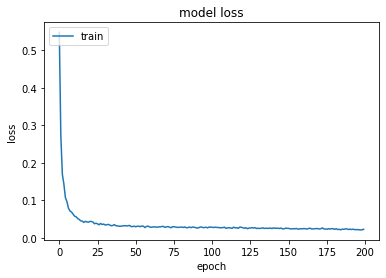

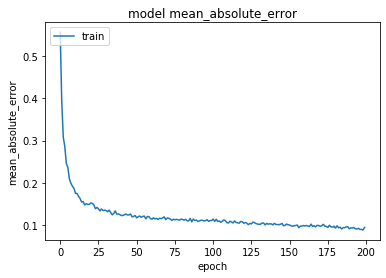

In [26]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
# from sklearn.metrics import max_error

pred = model.predict((X_new))
# print(pred)

mse = (mean_squared_error(Y_min_train,pred))

print(mse)
visualize_learning_curve(history)

In [27]:

X1 = input_1_arr[:,0:10000]*1000
Y1 = input_1_arr[:,10000:10004]

X=X1
Y=Y1[:,2:4]
# print(Y)
Y_new = np.zeros((Y.shape[0],2))
for i in range(len(Y)):
  
    print(Y[i],"y")
  

    X_t= X[i].transpose()

    scaler_rob_x = MinMaxScaler().fit((X_t.reshape(-1, 1)))
                        
    Xi = (scaler_rob_x.transform(X_t.reshape(-1, 1)))

    I = factor_fit.transform(Xi.transpose())

    pred = model.predict(I)

  
    Y_ti =Y[i].transpose()

#     scaler_rob_y = RobustScaler().fit(Y_ti.reshape(-1, 1))
    final_t = scaler_rob_x.inverse_transform(pred.reshape(-1, 1))
                                          

    final = final_t.transpose()
                                          
    print(final[0])

    h = abs(final-Y[i])
#   print(h,"h")
#     o=np.divide(h,Y[i])
#   print(o*100,"percentage") 
  
    Y_new[i]=final[0]


[ 30. -58.] y
[ 13.369384 -47.665356]
[ 30. -56.] y
[ 12.976942 -46.868614]
[ 58. -28.] y
[ 52.513042 -19.214937]
[ 56.4 -32. ] y
[ 45.667747 -18.431555]
[ 57.9    -23.8047] y
[ 59.483803 -10.486419]
[ 55.1    -26.4219] y
[ 52.59641 -16.28153]
[ 0.02      -0.0688594] y
[-11.583254 -65.27382 ]
[ 0.03      -0.0549297] y
[ 25.576973 -39.314766]
[  0.     -39.3672] y
[ -3.8570192 -37.523605 ]
[  0.     -39.2578] y
[ -1.9668388 -37.51948  ]
[ -5.     -39.9766] y
[  2.953199 -35.747673]
[  0.     -36.9063] y
[  2.9489422 -35.625412 ]
[ -5.     -40.9297] y
[  0.4808855 -35.56383  ]
[-10.     -41.7813] y
[  1.9640497 -35.719425 ]
[  0.     -27.8281] y
[ 11.896692 -17.676266]
[  0.     -30.0469] y
[ 12.6525545 -17.441996 ]
[ 0.     12.2813] y
[50.20587  22.381397]
[0.     7.0469] y
[40.206585  12.3816185]
[ 54.7    -24.8047] y
[ 56.84318  -11.474515]
[ 59.9    -23.0938] y
[ 57.52563 -13.49755]
[ 57.8    -24.9219] y
[ 57.327854 -15.856696]
[ 60.     -23.2578] y
[ 55.862667 -11.96979 ]
[ 59.3    

[ 10.932318 -17.975164]
[-25.     -59.9766] y
[-25.412592 -58.005737]
[-20.     -53.1953] y
[ -6.5579796 -45.843063 ]
[-20.     -55.5547] y
[-19.808025 -56.512215]
[-10.     -44.4453] y
[ -2.462664 -37.091442]
[-30.     -60.3516] y
[-16.926695 -55.375626]
[  0.     -37.5391] y
[  2.430234 -35.786514]
[  0.     -31.1641] y
[-56.184826 -87.08165 ]
[  0.     -32.8828] y
[-56.83874  -87.284325]
[ 0.     15.1094] y
[51.87134  22.315878]
[ 0.     14.7422] y
[53.11381  22.700966]
[  0.     -25.0859] y
[-56.31763 -86.54109]
[  0.     -26.8906] y
[-56.26344 -87.10602]
[-30.     -62.3438] y
[-19.177454 -55.72913 ]
[-30.     -62.5391] y
[-22.6204   -57.140327]
[-20.     -56.3672] y
[-16.210928 -55.379604]
[-20.     -57.8906] y
[-21.078625 -57.244186]
[-25.     -61.8125] y
[-18.731264 -55.934933]
[-30.     -63.2891] y
[-17.281218 -55.485508]
[-83.45878378 -38.91072023] y
[ 39.878437 -18.320436]
[-83.45878378 -38.91072023] y
[ 46.738453 -19.985775]
[-83.45878378 -38.91072023] y
[ 42.61648  -19.3726

In [28]:
X1 = X1
Y1 = Y1
# print(Y1)

# print(Y)
from sklearn.metrics import r2_score
print(Y1[0,2], Y_new[0,0])
# print(Y_new[:,0])
g = r2_score(Y1[:,2], Y_new[:,0])  
g1 = r2_score(Y1[:,3], Y_new[:,1]) 
print(g,g1)
Y1[:,2]= Y_new[:,0]
Y1[:,3]= Y_new[:,1]
# print(Y1[0,2], Y_new[0,0])


30.0 13.369383811950684
0.9946503499937274 -26.593061462686553


In [29]:

X1_new = np.concatenate((X1,Y1[:,2:4]),axis=1)
print(X1_new.shape)
Y1_new = Y1[:,0:2]
# print(Y1_new)
# X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X1_new, Y1_new, test_size=0.20)
X_train_c= X1_new
y_train_c = Y1_new

(397, 10002)


In [30]:
#standardise


# ######minmax
scaler_min_x = MinMaxScaler().fit(X_train_c)
scaler_min_y = MinMaxScaler().fit(y_train_c)

X_minmax_train = scaler_min_x.transform(X_train_c)
Y_minmax_train = scaler_min_y.transform(y_train_c)


# print(X)
# print(Y)
#####standard

scaler_stan_x = StandardScaler().fit(X_train_c)
scaler_stan_y = StandardScaler().fit(y_train_c)


X_stan_train = scaler_stan_x.transform(X_train_c)
Y_stan_train = scaler_stan_y.transform(y_train_c)

# #######normlised
# scaler_norm_x = Normalizer().fit(X_train_c)
# scaler_norm_y = Normalizer().fit(y_train_c)


# X_norm_train = scaler_norm_x.transform(X_train_c)
# Y_norm_train = scaler_norm_y.transform(y_train_c)


# # ################qt

# scaler_qt_x =  QuantileTransformer(output_distribution='normal').fit(X_train_c)
# scaler_qt_y =  QuantileTransformer(output_distribution='normal').fit(y_train_c)


# X_qt_train = scaler_qt_x.transform(X_train_c)
# Y_qt_train = scaler_qt_y.transform(y_train_c)


##robust
# print(X_train.shape)
# print(y_train.shape)
# X_train_t = X_train.transpose()
# y_train_t = y_train.transpose()
# print(X_train.shape,"after")
# print(y_train.shape,"after")
scaler_rob_x = MinMaxScaler().fit(X_train_c)
scaler_rob_y = MinMaxScaler().fit(y_train_c)


# X_rob_train = scaler_rob_x.transform(X_train_c)
# Y_rob_train = scaler_rob_y.transform(y_train_c)

In [31]:
import pickle
pickle.dump(scaler_rob_x, open( "./app/MODEL/scaler_rob_x_1_OFF.pkl", "wb" ) )
pickle.dump(scaler_rob_y, open( "./app/MODEL/scaler_rob_y_1_OFF.pkl", "wb" ) )
X_rob_train_c = scaler_rob_x.transform(X_train_c)
Y_rob_train_c = scaler_rob_y.transform(y_train_c)



In [32]:
#apply PCA on X1_new
transformer = FactorAnalysis(n_components=30, random_state=0)
factor_fit = transformer.fit(X_rob_train_c[:,0:10000])
X_new1 = factor_fit.transform(X_rob_train_c[:,0:10000])
print(X_new1.shape)
X_new1 = np.concatenate((X_new1,X_rob_train_c[:,10000:10002]),axis=1)
print(X_new1.shape)
# print((X_rob_train[:,0:10000].shape))

(397, 30)
(397, 32)


In [33]:
import pickle
pickle.dump(factor_fit, open( "./app/MODEL/factor_fit_1_OFF.pkl", "wb" ) )


In [34]:
def baseline_model_31(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(30, activation='relu', 
                    kernel_initializer = 'he_normal', 
                    input_shape=(32,)))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
#     model.add(Dense(30, activation='relu',
#                     kernel_initializer = 'he_normal'))
#       model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    model.add(Dense(12, activation='relu',
                    kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    model.add(Dense(9, activation='relu',
                    kernel_initializer = 'he_normal'))
    model.add(BatchNormalization())
#     model.add(Dropout(0.5))
    model.add(Dense(2, activation='linear', 
                    kernel_initializer='he_normal'))
    model.compile(loss = 'mse', optimizer=optimizer, metrics=['mae'])
#     model.summary()
    return model



In [35]:
model1 = baseline_model_31()

# estimator1 = train_data_nn_1(X_new1, Y_rob_train)

# print(X_new.shape)
# print(y_train.shape)
history_1 = model1.fit(X_new1,  Y_rob_train_c, epochs=400, batch_size=5,  verbose=1, validation_split=0.0)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Epoch 1/400
397/397 [==============================] - 1s 2ms/step - loss: 1.1849 - mean_absolute_error: 0.8655
Epoch 2/400
397/397 [==============================] - 0s 332us/step - loss: 0.7079 - mean_absolute_error: 0.6745
Epoch 3/400
397/397 [==============================] - 0s 343us/step - loss: 0.5185 - mean_absolute_error: 0.5720
Epoch 4/400
397/397 [==============================] - 0s 331us/step - loss: 0.4028 - mean_absolute_error: 0.5144
Epoch 5/400
397/397 [==============================] - 0s 334us/step - loss: 0.3174 - mean_absolute_error: 0.4416
Epoch 6/400
397/397 [==============================] - 0s 330us/step - loss: 0.2381 - mean_absolute_error: 0.3884
Epoch 7/400
397/397 [==============================] - 0s 337us/step - loss: 0.2157 - mean_absolute_error: 0.3715
Epoch 8/400
397/397 [==============================] - 0s 336us/step - loss: 0.1986 - mea

397/397 [==============================] - 0s 336us/step - loss: 0.0431 - mean_absolute_error: 0.1319
Epoch 70/400
397/397 [==============================] - 0s 332us/step - loss: 0.0445 - mean_absolute_error: 0.1344
Epoch 71/400
397/397 [==============================] - 0s 334us/step - loss: 0.0438 - mean_absolute_error: 0.1329
Epoch 72/400
397/397 [==============================] - 0s 329us/step - loss: 0.0420 - mean_absolute_error: 0.1283
Epoch 73/400
397/397 [==============================] - 0s 331us/step - loss: 0.0429 - mean_absolute_error: 0.1322
Epoch 74/400
397/397 [==============================] - 0s 333us/step - loss: 0.0435 - mean_absolute_error: 0.1314
Epoch 75/400
397/397 [==============================] - 0s 339us/step - loss: 0.0443 - mean_absolute_error: 0.1332
Epoch 76/400
397/397 [==============================] - 0s 347us/step - loss: 0.0444 - mean_absolute_error: 0.1359
Epoch 77/400
397/397 [==============================] - 0s 354us/step - loss: 0.0434 - mean_a

397/397 [==============================] - 0s 481us/step - loss: 0.0371 - mean_absolute_error: 0.1098
Epoch 141/400
397/397 [==============================] - 0s 483us/step - loss: 0.0365 - mean_absolute_error: 0.1076
Epoch 142/400
397/397 [==============================] - 0s 480us/step - loss: 0.0342 - mean_absolute_error: 0.1051
Epoch 143/400
397/397 [==============================] - 0s 482us/step - loss: 0.0371 - mean_absolute_error: 0.1079
Epoch 144/400
397/397 [==============================] - 0s 480us/step - loss: 0.0387 - mean_absolute_error: 0.1117
Epoch 145/400
397/397 [==============================] - 0s 478us/step - loss: 0.0359 - mean_absolute_error: 0.1086
Epoch 146/400
397/397 [==============================] - 0s 506us/step - loss: 0.0371 - mean_absolute_error: 0.1101
Epoch 147/400
397/397 [==============================] - 0s 480us/step - loss: 0.0345 - mean_absolute_error: 0.1043
Epoch 148/400
397/397 [==============================] - 0s 463us/step - loss: 0.0401 

397/397 [==============================] - 0s 348us/step - loss: 0.0355 - mean_absolute_error: 0.1054
Epoch 211/400
397/397 [==============================] - 0s 348us/step - loss: 0.0338 - mean_absolute_error: 0.1044
Epoch 212/400
397/397 [==============================] - 0s 350us/step - loss: 0.0341 - mean_absolute_error: 0.1051
Epoch 213/400
397/397 [==============================] - 0s 351us/step - loss: 0.0338 - mean_absolute_error: 0.1045
Epoch 214/400
397/397 [==============================] - 0s 352us/step - loss: 0.0355 - mean_absolute_error: 0.1053
Epoch 215/400
397/397 [==============================] - 0s 347us/step - loss: 0.0350 - mean_absolute_error: 0.1053
Epoch 216/400
397/397 [==============================] - 0s 368us/step - loss: 0.0336 - mean_absolute_error: 0.1026
Epoch 217/400
397/397 [==============================] - 0s 365us/step - loss: 0.0339 - mean_absolute_error: 0.1036
Epoch 218/400
397/397 [==============================] - 0s 361us/step - loss: 0.0315 

397/397 [==============================] - 0s 443us/step - loss: 0.0327 - mean_absolute_error: 0.1009
Epoch 281/400
397/397 [==============================] - 0s 461us/step - loss: 0.0296 - mean_absolute_error: 0.0949
Epoch 282/400
397/397 [==============================] - 0s 449us/step - loss: 0.0309 - mean_absolute_error: 0.0967
Epoch 283/400
397/397 [==============================] - 0s 446us/step - loss: 0.0339 - mean_absolute_error: 0.1003
Epoch 284/400
397/397 [==============================] - 0s 449us/step - loss: 0.0324 - mean_absolute_error: 0.1008
Epoch 285/400
397/397 [==============================] - 0s 415us/step - loss: 0.0336 - mean_absolute_error: 0.1004
Epoch 286/400
397/397 [==============================] - 0s 454us/step - loss: 0.0340 - mean_absolute_error: 0.0999
Epoch 287/400
397/397 [==============================] - 0s 466us/step - loss: 0.0332 - mean_absolute_error: 0.1007
Epoch 288/400
397/397 [==============================] - 0s 452us/step - loss: 0.0323 

397/397 [==============================] - 0s 360us/step - loss: 0.0318 - mean_absolute_error: 0.0990
Epoch 351/400
397/397 [==============================] - 0s 349us/step - loss: 0.0320 - mean_absolute_error: 0.0998
Epoch 352/400
397/397 [==============================] - 0s 346us/step - loss: 0.0311 - mean_absolute_error: 0.0953
Epoch 353/400
397/397 [==============================] - 0s 342us/step - loss: 0.0296 - mean_absolute_error: 0.0931
Epoch 354/400
397/397 [==============================] - 0s 341us/step - loss: 0.0324 - mean_absolute_error: 0.1004
Epoch 355/400
397/397 [==============================] - 0s 336us/step - loss: 0.0292 - mean_absolute_error: 0.0915
Epoch 356/400
397/397 [==============================] - 0s 337us/step - loss: 0.0306 - mean_absolute_error: 0.0973
Epoch 357/400
397/397 [==============================] - 0s 338us/step - loss: 0.0301 - mean_absolute_error: 0.0957
Epoch 358/400
397/397 [==============================] - 0s 341us/step - loss: 0.0308 

(397, 2)
0.027379716855218547
dict_keys(['loss', 'mean_absolute_error'])


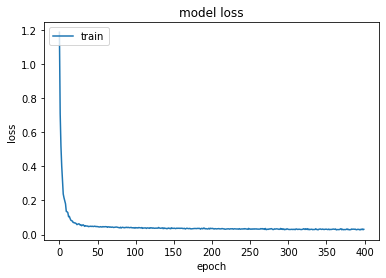

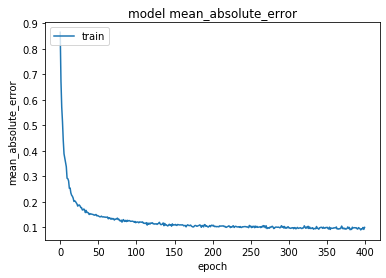

In [42]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
import math
# from sklearn.metrics import max_error

pred_c = model1.predict((X_new1))
print(pred_c.shape)

mse = (mean_squared_error(Y_rob_train_c,pred_c))

print(mse)
visualize_learning_curve(history_1)


In [38]:
Final = []
for i in range(len(y_train_c)):
  
    print(y_train_c[i],"ytest[i]")
#     print(X_train_c[i])
    
    X_c = (scaler_rob_x.transform(X_train_c[i].reshape(1, -1)))

#     print(X_c)
    I = factor_fit.transform(X_c[:,0:10000])
    I = np.concatenate((I,X_c[:,10000:10002]),axis=1)
#   print(I.shape,"I shape")

    pred_c = model1.predict(I)
#     print(pred_c,"pred_c.shape")
  
 

  
    final = scaler_rob_y.inverse_transform(pred_c.reshape(1, -1))
#     print(final,"final")                               
    final[0][0]= np.abs(np.round(final[0][0]))
    #     print(final[0],"final")
    k=[]
    k.append(final[0][0])
    k.append(final[0][1])
    Final.append(k)


                                          
    print(final[0],"final")

    h = abs(final[0]-y_train_c[i])
Final_np = np.asarray(Final, dtype=np.float32)    
# print(Final)
print(y_train_c[100,1], Final_np[100,1])
r2_time = r2_score(y_train_c[:,1], Final_np[:,1]) 
print(r2_time,"stabilization time")

[0.    7.997] ytest[i]
[0.       4.216458] final
[0.    7.992] ytest[i]
[0.        3.5976193] final
[0. 8.] ytest[i]
[0.        6.4993176] final
[0. 8.] ytest[i]
[0.       7.599846] final
[0. 8.] ytest[i]
[0.        5.5021243] final
[0.    4.377] ytest[i]
[0.        5.0296597] final
[0.       0.007997] ytest[i]
[0.       3.958587] final
[0.       0.007704] ytest[i]
[0.       3.889696] final
[0.    1.088] ytest[i]
[0.        1.8448887] final
[0.    1.088] ytest[i]
[0.        1.8490009] final
[0.    1.259] ytest[i]
[0.        2.0752573] final
[0.   1.26] ytest[i]
[0.        2.3397508] final
[0.    0.987] ytest[i]
[0.        2.7763672] final
[0.    7.734] ytest[i]
[0.        3.3080847] final
[0.    1.333] ytest[i]
[0.        2.2272856] final
[0.    1.335] ytest[i]
[0.        2.0884726] final
[0.    1.189] ytest[i]
[0.        2.0804763] final
[0.    1.317] ytest[i]
[0.        2.1163728] final
[0.    4.627] ytest[i]
[0.       5.307812] final
[0.    7.901] ytest[i]
[0.       5.266311] final


[0.        5.0979724] final
[0.    7.993] ytest[i]
[0.       6.507432] final
[0.    7.991] ytest[i]
[0.        4.4756384] final
[0.   7.99] ytest[i]
[0.        3.9657962] final
[0.   1.19] ytest[i]
[0.        1.9884468] final
[0.    1.178] ytest[i]
[0.        1.8836726] final
[0.    1.101] ytest[i]
[0.       2.257595] final
[0.    7.689] ytest[i]
[0.        3.3865669] final
[0.    1.263] ytest[i]
[0.        2.3409686] final
[0.    1.233] ytest[i]
[0.        1.8500764] final
[0.    7.805] ytest[i]
[0.        3.2929688] final
[0.    1.263] ytest[i]
[0.        2.2353003] final
[0.    1.199] ytest[i]
[0.       1.737895] final
[0.    1.197] ytest[i]
[0.        1.5273677] final
[0.  1.3] ytest[i]
[0.        1.6921093] final
[0.   1.28] ytest[i]
[0.        1.8401065] final
[0.    1.079] ytest[i]
[0.        2.3543189] final
[0.    1.082] ytest[i]
[0.        2.5081098] final
[0.    1.428] ytest[i]
[0.        2.5379424] final
[0.    1.246] ytest[i]
[0.        2.0379593] final
[0.    1.339] ytest

In [39]:

from keras.backend import manual_variable_initialization 
manual_variable_initialization(True)
model.save ("./app/MODEL/my_model_OFF.h5")
model1.save ("./app/MODEL/my_model_1_OFF.h5")





# print(model.get_weights())

print (model1.get_weights())
model1.save_weights("on_1.h5")

[array([[-0.20955849, -0.02966004, -0.06975824, -0.34044018,  0.40840343,
         0.45637697,  0.08439308,  0.04427025,  0.05986654,  0.05042548,
        -0.01051738,  0.5808257 , -0.04833255, -0.1133244 ,  0.09665569,
        -0.21972431,  0.14838968, -0.09666391,  0.15851472,  0.6243187 ,
         0.19580579,  0.10410159, -0.12963115, -0.02007479, -0.02929221,
        -0.03490636,  0.15399024, -0.04794594,  0.30970612, -0.25512654],
       [-0.2692955 ,  0.11101212,  0.41239008, -0.22651969, -0.11869007,
        -0.26197487, -0.45282212,  0.2882518 ,  0.69426423,  0.6580187 ,
        -0.23986813, -0.10433193, -0.07800017,  0.40982825, -0.0133964 ,
         0.40459913,  0.81252456,  0.46724272, -0.4345396 , -0.11254603,
         0.00721032, -0.06135016, -0.293448  ,  0.42018336, -0.24144791,
         0.38162234,  0.45105076, -0.06017541, -0.17206928, -0.10095539],
       [ 0.06935041,  0.19266202,  0.22879039,  0.12276103,  0.22223496,
        -0.01010104, -0.20634282,  0.31755918,  

In [40]:
# from keras.models import load_model
# new_model = load_model('my_model_ON.h5')
# new_model_1 = load_model('my_model_1_ON.h5')

In [41]:
# pred = new_model_1.predict((X_new1))
# print(pred.shape)

# mse = (mean_squared_error(Y_rob_train,pred))

# print(mse)